## 1. Explore .json file

In [1]:
import json
 
with open('data/train_anno.json') as f:
    landmark = json.load(f)
type(landmark)

# check the keys
landmark.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [2]:
# check the first image
landmark['images'][0]

{'license': 1,
 'file_name': 'CSK6-003-004_000191.jpg',
 'coco_url': '',
 'height': 480,
 'width': 640,
 'date_captured': '2023-07-17 17:41:09',
 'flickr_url': '',
 'id': 1}

In [3]:
# check the first annotations
print("bbox:", landmark['annotations'][0]['bbox'])
print("keypoints: ", landmark['annotations'][0]['keypoints'])
print("number of keypoints: ", landmark['annotations'][0]['num_keypoints'])
print("length of keypoints: ", len(landmark['annotations'][0]['keypoints']))

bbox: [70, 43, 103, 131]
keypoints:  [145.0, 54.0, 1.0, 110.0, 68.0, 0.0, 91.0, 99.0, 0.0, 86.0, 130.0, 0.0, 91.0, 170.0, 1.0, 101.0, 104.0, 1.0, 85.0, 154.0, 1.0, 91.0, 144.0, 0.0, 94.0, 127.0, 0.0, 124.0, 109.0, 1.0, 110.0, 165.0, 1.0, 112.0, 150.0, 0.0, 114.0, 130.0, 0.0, 145.0, 113.0, 1.0, 131.0, 168.0, 1.0, 130.0, 152.0, 0.0, 131.0, 133.0, 0.0, 166.0, 119.0, 1.0, 148.0, 165.0, 1.0, 148.0, 150.0, 0.0, 147.0, 136.0, 0.0]
number of keypoints:  10.0
length of keypoints:  63


#### Keypoints: (x, y, v)

#### v => visibility flag?
-> v == 0: not labeled (in which case x=y=0) \
-> v == 1: labeled but not visible \
-> v == 2: labeled and visible.

## 2. Try to visualize the first image with keypoints and bounding boxes

In [4]:
points = []
points.append(landmark['annotations'][0]['keypoints'])
points.append(landmark['annotations'][1]['keypoints'])
points.append(landmark['annotations'][2]['keypoints'])

x_out = []
y_out = []
x_in = []
y_in = []
for keypoints in points:
    for i in range(0, len(keypoints), 3):
        if int(keypoints[i+2]) == 1:
            x_out.append(keypoints[i])
            y_out.append(keypoints[i+1])
            x_in.append(0)
            y_in.append(0)
        else:
            x_out.append(0)
            y_out.append(0)
            x_in.append(keypoints[i])
            y_in.append(keypoints[i+1])


In [5]:
img_name = landmark['images'][0]['file_name']
h = landmark['images'][0]['height']
w = landmark['images'][0]['width']
print(f"image file name: {img_name}, width: {w}, height: {h}.")

bboxes = []
bboxes.append(landmark['annotations'][0]['bbox'])
bboxes.append(landmark['annotations'][1]['bbox'])
bboxes.append(landmark['annotations'][2]['bbox'])
print(bboxes)

image file name: CSK6-003-004_000191.jpg, width: 640, height: 480.
[[70, 43, 103, 131], [406, 222, 146, 199], [187, 192, 147, 175]]


In [6]:
import cv2

def plot_box(image, bboxes):
    """ Function to plot the image with bounding box """
    for bb in bboxes:
        xmin, ymin, w, h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3])
        xmax = bb[0]+bb[2]
        ymax = bb[1]+bb[3]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255, 0, 0))
    return image

(-0.5, 639.5, 479.5, -0.5)

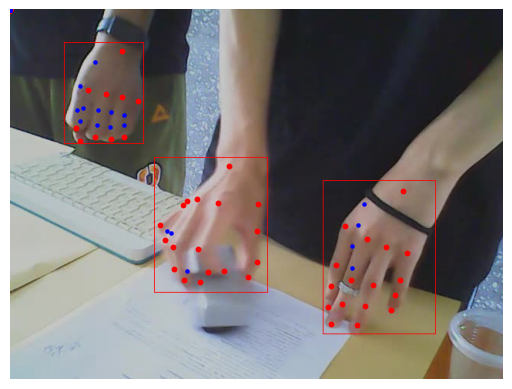

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

image = cv2.imread("data/image/" + img_name)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_image = plot_box(img, bboxes)
plt.imshow(result_image)
plt.scatter(x_out, y_out, c='red', s = 10)
plt.scatter(x_in, y_in, c='blue', s = 5)
plt.axis('off')

## 3. Extract information from .json to .txt: 
##### `class_index center_x center_y width height x1 y1 v1 x2 y2 v2 x3 y3 v3 ...`

### 3.1 Create new folders

- data
    - train
        - images
        - labels
    - test
        - images
        - labels

In [8]:
import os
from pathlib import Path
# create train and test folder

train_path = Path("Data/train")
test_path = Path("Data/test")
os.makedirs(train_path, exist_ok = True)
os.makedirs(test_path, exist_ok = True)

img_train = os.path.join(train_path, "images")
anno_train = os.path.join(train_path, "labels")
img_test = os.path.join(test_path, "images")
anno_test = os.path.join(test_path, "labels")

os.makedirs(img_train, exist_ok = True)
os.makedirs(anno_train, exist_ok = True)
os.makedirs(img_test, exist_ok = True)
os.makedirs(anno_test, exist_ok = True)

In [9]:
# get a list of all the images
images_path = Path("Data/image")
image_path_list = list(images_path.glob("*.jpg"))
image_path_list[:3]

[PosixPath('Data/image/学习机T20-003-004_000439.jpg'),
 PosixPath('Data/image/CSK6-003-004_000383.jpg'),
 PosixPath('Data/image/学习机CK1.0-003-004_000435.jpg')]

In [10]:
# split the data image into train and test sets
from math import floor
import random

def get_train_test_sets(file_list):
    random.shuffle(file_list)
    split = 0.8
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return training, testing

In [11]:
train_list, test_list = get_train_test_sets(image_path_list)
train_list[:2], test_list[:2]

([PosixPath('Data/image/正锋RGB-003-004_000579.jpg'),
  PosixPath('Data/image/手机-003-004_000384.jpg')],
 [PosixPath('Data/image/CSK6-003-004_000374.jpg'),
  PosixPath('Data/image/正锋RGB-003-004_000315.jpg')])

### 3.2 Try to convert the annotations of one image

In [12]:
print("number of images:", len(landmark['images']))
print("number of annotations:", len(landmark['annotations']))

number of images: 981
number of annotations: 3478


In [22]:
import pybboxes as pbx

bboxes = []
keypoints = []
img_id = 1
for anno in landmark['annotations']:
    if anno["image_id"] != img_id:
        break
    else:
        bboxes.append(anno["bbox"])
        keypoints.append(anno["keypoints"])

W = landmark["images"][img_id]["width"]
H = landmark["images"][img_id]["height"]

s = ""
for i in range(len(bboxes)):
    # deal with bounding boxes
    xmin, ymin, w, h = bboxes[i][0], bboxes[i][1], bboxes[i][2], bboxes[i][3]
    xmax = xmin + w
    ymax = ymin + h
    voc_bbox = [xmin, ymin, xmax, ymax]
    x, y, w, h = pbx.convert_bbox(voc_bbox, from_type="voc", to_type="yolo", image_size=(W,H))
    
    s += "0 " + str(x) + " " + str(y) + " " + str(w) + " " + str(h) + " " + " ".join([str(j) for j in keypoints[i]]) + "\n"

print(s)

with open("test_one_img.txt", 'w') as f:
    f.write(s)
f.close()


0 0.06328125 0.10046296296296296 0.05364583333333333 0.12129629629629629 145.0 54.0 1.0 110.0 68.0 0.0 91.0 99.0 0.0 86.0 130.0 0.0 91.0 170.0 1.0 101.0 104.0 1.0 85.0 154.0 1.0 91.0 144.0 0.0 94.0 127.0 0.0 124.0 109.0 1.0 110.0 165.0 1.0 112.0 150.0 0.0 114.0 130.0 0.0 145.0 113.0 1.0 131.0 168.0 1.0 130.0 152.0 0.0 131.0 133.0 0.0 166.0 119.0 1.0 148.0 165.0 1.0 148.0 150.0 0.0 147.0 136.0 0.0
0 0.24947916666666667 0.29768518518518516 0.07604166666666666 0.18425925925925926 510.0 235.0 1.0 459.0 252.0 0.0 451.0 279.0 0.0 444.0 307.0 0.0 444.0 335.0 0.0 435.0 281.0 1.0 423.0 331.0 1.0 416.0 359.0 1.0 412.0 386.0 1.0 463.0 298.0 1.0 442.0 351.0 1.0 431.0 382.0 1.0 416.0 408.0 1.0 488.0 308.0 1.0 471.0 357.0 1.0 460.0 385.0 1.0 450.0 410.0 1.0 515.0 316.0 1.0 506.0 351.0 1.0 500.0 371.0 1.0 494.0 390.0 1.0
0 0.13567708333333334 0.2587962962962963 0.0765625 0.16203703703703703 284.0 203.0 1.0 321.0 252.0 1.0 320.0 287.0 1.0 320.0 328.0 1.0 309.0 347.0 1.0 270.0 251.0 1.0 244.0 311.0 1.0